In [1]:
import numpy
import pylab
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import cmath
import random
from IPython import display

In [2]:
#Angles
A=numpy.array([])
B=numpy.array([])
C=numpy.array([])
for i in range (0,100):
    Alpha12=random.uniform(0, 2*numpy.pi)
    Alpha13=random.uniform(0, 2*numpy.pi)
    Alpha14=random.uniform(0, 2*numpy.pi) 
    A=numpy.append(A, Alpha12)
    B=numpy.append(B, Alpha13) 
    C=numpy.append(C, Alpha14)

In [3]:
#Normal hierarchy parameters (Best Fit)

T12=numpy.arcsin((0.307)**(1/2))
T13=numpy.arcsin((0.022)**(1/2))
T14=numpy.arcsin((0.023)**(1/2))

maxT12=numpy.arcsin((0.346)**(1/2))
maxT13=numpy.arcsin((0.0241)**(1/2))
maxT14=numpy.arcsin((0.04)**(1/2))

minT12=numpy.arcsin((0.268)**(1/2))
minT13=numpy.arcsin((0.0199)**(1/2))
minT14=numpy.arcsin((0.006)**(1/2))

NHs12=(numpy.sin(T12))**2
NHs13=(numpy.sin(T13))**2
NHc12=(numpy.cos(T12))**2
NHc13=(numpy.cos(T13))**2
NHs14=(numpy.sin(T14))**2
NHc14=(numpy.cos(T14))**2

#NHs14=0
#NHc14=1

solarmass=0.0000753
atmmass=0.0025283
LSNDmass=1.78
#LSNDmass=0

#solarmass=del_m21^2
#atmmass=del_m31^2

#Normal hierarchy parameters (3 sigma)

maxNHs12=(numpy.sin(maxT12))**2
minNHs12=(numpy.sin(minT12))**2

maxNHs13=(numpy.sin(maxT13))**2
minNHs13=(numpy.sin(minT13))**2

maxNHc12=(numpy.cos(minT12))**2
minNHc12=(numpy.cos(maxT12))**2

maxNHc13=(numpy.cos(minT13))**2
minNHc13=(numpy.cos(maxT13))**2

maxNHs14=(numpy.sin(maxT14))**2
minNHs14=(numpy.sin(minT14))**2

maxNHc14=(numpy.cos(minT14))**2
minNHc14=(numpy.cos(maxT14))**2

maxsolarmass=0.0000807
minsolarmass=0.0000699

maxatmmass=0.0025631
minatmmass=0.0024935

maxLSNDmass=2.01
minLSNDmass=1.61

NHm1=numpy.linspace(0.0001,0.001,2000) 
NHm1=numpy.append(NHm1, numpy.linspace(0.001,0.01,2000))
NHm1=numpy.append(NHm1, numpy.linspace(0.01,0.1,2000))
NHm1=numpy.append(NHm1, numpy.linspace(0.1,1,2000))
NHm1=numpy.append(NHm1, numpy.linspace(1,10,2000))

maxNHm2=(NHm1**2+maxsolarmass)**(1/2)
NHm2=(NHm1**2+solarmass)**(1/2)
minNHm2=(NHm1**2+minsolarmass)**(1/2)

maxNHm3=(NHm1**2+maxatmmass)**(1/2)
NHm3=(NHm1**2+atmmass)**(1/2)
minNHm3=(NHm1**2+minatmmass)**(1/2)

maxNHm4=(NHm1**2-minLSNDmass)**(1/2)
NHm4=(NHm1**2-LSNDmass)**(1/2)
minNHm4=(NHm1**2-maxLSNDmass)**(1/2)

C:\Users\pacoh\AppData\Local\Temp/ipykernel_10144/724833934.py:76: RuntimeWarning: invalid value encountered in sqrt
  maxNHm4=(NHm1**2-minLSNDmass)**(1/2)
C:\Users\pacoh\AppData\Local\Temp/ipykernel_10144/724833934.py:77: RuntimeWarning: invalid value encountered in sqrt
  NHm4=(NHm1**2-LSNDmass)**(1/2)
C:\Users\pacoh\AppData\Local\Temp/ipykernel_10144/724833934.py:78: RuntimeWarning: invalid value encountered in sqrt
  minNHm4=(NHm1**2-maxLSNDmass)**(1/2)


In [4]:
#Inverted Hierarchy parameters (Best Fit)

IT12=numpy.arcsin((0.307)**(1/2))
IT13=numpy.arcsin((0.022)**(1/2))
IT14=numpy.arcsin((0.023)**(1/2))

maxIT12=numpy.arcsin((0.346)**(1/2))
maxIT13=numpy.arcsin((0.0241)**(1/2))
maxIT14=numpy.arcsin((0.04)**(1/2))

minIT12=numpy.arcsin((0.268)**(1/2))
minIT13=numpy.arcsin((0.0199)**(1/2))
minIT14=numpy.arcsin((0.006)**(1/2))

IHs12=(numpy.sin(IT12))**2
IHs13=(numpy.sin(IT13))**2
IHc12=(numpy.cos(IT12))**2
IHc13=(numpy.cos(IT13))**2
IHs14=(numpy.sin(IT14))**2
IHc14=(numpy.cos(IT14))**2

#IHs14=0
#IHc14=1

Isolarmass=0.0000753
Iatmmass=0.002536
ILSNDmass=1.78

#Inverted Hierarchy parameters (3 sigma)

maxIHs12=(numpy.sin(maxT12))**2
minIHs12=(numpy.sin(minT12))**2

maxIHs13=(numpy.sin(maxIT13))**2
minIHs13=(numpy.sin(minIT13))**2

maxIHc12=(numpy.cos(minIT12))**2
minIHc12=(numpy.cos(maxIT12))**2

maxIHc13=(numpy.cos(minIT13))**2
minIHc13=(numpy.cos(maxIT13))**2

maxIHs14=(numpy.sin(maxIT14))**2
minIHs14=(numpy.sin(minIT14))**2

maxIHc14=(numpy.cos(minIT14))**2
minIHc14=(numpy.cos(maxIT14))**2

maxIsolarmass=0.0000807
minIsolarmass=0.0000699

maxIatmmass=0.002638
minIatmmass=0.002434

maxILSNDmass=2.01
minILSNDmass=1.61

IHm3=numpy.linspace(0.0001,0.001,2000) 
IHm3=numpy.append(IHm3, numpy.linspace(0.001,0.01,2000))
IHm3=numpy.append(IHm3, numpy.linspace(0.01,0.1,2000))
IHm3=numpy.append(IHm3, numpy.linspace(0.1,1,2000))
IHm3=numpy.append(IHm3, numpy.linspace(1,10,2000))

maxIHm2=(IHm3**2+maxIsolarmass+maxIatmmass)**(1/2)
IHm2=(IHm3**2+Isolarmass+Iatmmass)**(1/2)
minIHm2=(IHm3**2+minIsolarmass+minIatmmass)**(1/2)

maxIHm1=(IHm3**2+maxIatmmass)**(1/2)
IHm1=(IHm3**2+Iatmmass)**(1/2)
minIHm1=(IHm3**2+minIatmmass)**(1/2)

maxIHm4=(IHm3**2-minILSNDmass+maxIatmmass)**(1/2)
IHm4=(IHm3**2-ILSNDmass+Iatmmass)**(1/2)
minIHm4=(IHm3**2-maxILSNDmass+minIatmmass)**(1/2)

#solarmass=del_m21^2
#atmmass=del_m31^2

C:\Users\pacoh\AppData\Local\Temp/ipykernel_10144/4210835871.py:72: RuntimeWarning: invalid value encountered in sqrt
  maxIHm4=(IHm3**2-minILSNDmass+maxIatmmass)**(1/2)
C:\Users\pacoh\AppData\Local\Temp/ipykernel_10144/4210835871.py:73: RuntimeWarning: invalid value encountered in sqrt
  IHm4=(IHm3**2-ILSNDmass+Iatmmass)**(1/2)
C:\Users\pacoh\AppData\Local\Temp/ipykernel_10144/4210835871.py:74: RuntimeWarning: invalid value encountered in sqrt
  minIHm4=(IHm3**2-maxILSNDmass+minIatmmass)**(1/2)


In [5]:
NHm111=numpy.linspace(0.0001,0.001,2000) 
NHm111=numpy.append(NHm111, numpy.linspace(0.001,0.01,2000))
NHm111=numpy.append(NHm111, numpy.linspace(0.01,0.1,2000))
NHm111=numpy.append(NHm111, numpy.linspace(0.1,1,2000))
NHm111=numpy.append(NHm111, numpy.linspace(1,10,2000))

maxNHm222=(NHm111**2+maxsolarmass)**(1/2)
NHm222=(NHm111**2+solarmass)**(1/2)
minNHm222=(NHm111**2+minsolarmass)**(1/2)

maxNHm333=(NHm111**2+maxatmmass)**(1/2)
NHm333=(NHm111**2+atmmass)**(1/2)
minNHm333=(NHm111**2+minatmmass)**(1/2)



IHm333=numpy.linspace(0.0001,0.001,2000) 
IHm333=numpy.append(IHm333, numpy.linspace(0.001,0.01,2000))
IHm333=numpy.append(IHm333, numpy.linspace(0.01,0.1,2000))
IHm333=numpy.append(IHm333, numpy.linspace(0.1,1,2000))
IHm333=numpy.append(IHm333, numpy.linspace(1,10,2000))

maxIHm222=(IHm333**2+maxIsolarmass+maxIatmmass)**(1/2)
IHm222=(IHm333**2+Isolarmass+Iatmmass)**(1/2)
minIHm222=(IHm333**2+minIsolarmass+minIatmmass)**(1/2)

maxIHm111=(IHm333**2+maxIatmmass)**(1/2)
IHm111=(IHm333**2+Iatmmass)**(1/2)
minIHm111=(IHm333**2+minIatmmass)**(1/2)

<IPython.core.display.Javascript object>


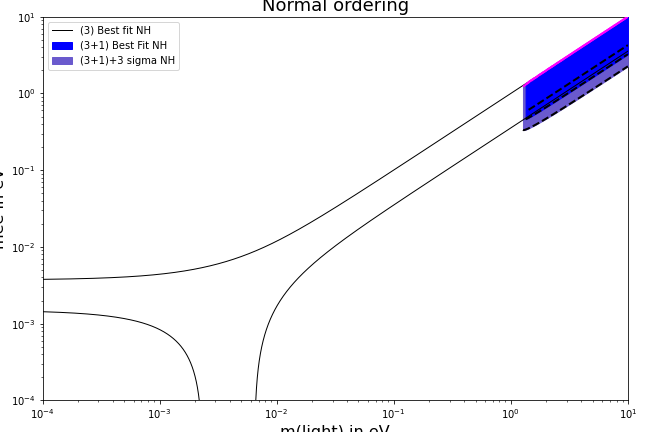

In [6]:
plt.figure(figsize=(9,6))

#for i in range(0,1000):
    #NHm4=numpy.linspace(0,1,10000)
#    NHmee=abs(NHc12*NHc13*NHc14*NHm1 + 
#              NHs12*NHc13*NHc14*NHm2*cmath.exp(complex(0,A[i])) + 
#              NHs13*NHc14*NHm3*cmath.exp(complex(0,B[i])) +
#              NHs14*NHm4*cmath.exp(complex(0,C[i])))

#    pylab.plot(NHm1,NHmee,color="blue",linestyle="-",linewidth=1, alpha=1,zorder=12)
    
#for i in range(0,1000):
    #NHm4=numpy.linspace(0,1,10000)
#    maxNHmee=abs(minNHc12*minNHc13*minNHc14*NHm1 + 
#              maxNHs12*minNHc13*minNHc14*maxNHm2*cmath.exp(complex(0,A[i])) + 
#              maxNHs13*minNHc14*maxNHm3*cmath.exp(complex(0,B[i])) +
#              maxNHs14*maxNHm4*cmath.exp(complex(0,C[i])))

#    pylab.plot(NHm1,maxNHmee,color="green",linestyle="-",linewidth=1, alpha=1)
    
#for i in range(0,1000):
    #NHm4=numpy.linspace(0,1,10000)
#    minNHmee=abs(maxNHc12*maxNHc13*maxNHc14*NHm1 + 
#              minNHs12*maxNHc13*maxNHc14*minNHm2*cmath.exp(complex(0,A[i])) + 
#              minNHs13*maxNHc14*minNHm3*cmath.exp(complex(0,B[i])) +
#              minNHs14*minNHm4*cmath.exp(complex(0,C[i])))

#    pylab.plot(NHm1,minNHmee,color="red",linestyle="-",linewidth=1, alpha=1,zorder=13)

NHmee1=abs(NHc12*NHc13*NHm111 - NHs12*NHc13*NHm222 + NHs13*NHm333)                           
NHmee2=abs(NHc12*NHc13*NHm111 + NHs12*NHc13*NHm222 + NHs13*NHm333)
NHmee3=abs(NHc12*NHc13*NHm111 - NHs12*NHc13*NHm222 - NHs13*NHm333)

NHm1filt1=NHm111[NHm111<0.0024]
NHm1filt3=NHm111[NHm111>0.0065]
NHmee1filt1=NHmee1[NHm111<0.0024]
NHmee3filt3=NHmee3[NHm111>0.0065]

pylab.plot(NHm1filt1,NHmee1filt1,color="black",label="(3) Best fit NH",linestyle="-",linewidth=1, alpha=1,zorder=14)
pylab.plot(NHm111,NHmee2,color="black",linestyle="-",linewidth=1, alpha=1,zorder=14)
pylab.plot(NHm1filt3,NHmee3filt3,color="black",linestyle="-",linewidth=1, alpha=1,zorder=14)



NHmee11=abs(NHc12*NHc13*NHc14*NHm1 + 
                  NHs12*NHc13*NHc14*NHm2*cmath.exp(complex(0,0*numpy.pi)) + 
                  NHs13*NHm3*NHc14*cmath.exp(complex(0,0*numpy.pi)) + 
                  NHs14*NHm4*cmath.exp(complex(0,0*numpy.pi))) #All masses different, 0,0,0 (in terms of pi)

NHmee12=abs(NHc12*NHc13*NHc14*NHm1 + 
                  NHs12*NHc13*NHc14*NHm2*cmath.exp(complex(0,1*numpy.pi)) + 
                  NHs13*NHm3*NHc14*cmath.exp(complex(0,0)) + 
                  NHs14*NHm4*cmath.exp(complex(0,numpy.pi))) #All masses different, 0,0,1 (in terms of pi)

NHmee16=abs(NHc12*NHc13*NHc14*NHm1 + 
                  NHs12*NHc13*NHc14*NHm2*cmath.exp(complex(0,(1)*numpy.pi)) + 
                  NHs13*NHm3*NHc14*cmath.exp(complex(0,(1)*numpy.pi)) + 
                  NHs14*NHm4*cmath.exp(complex(0,(1)*numpy.pi))) #All masses different, 1,1,1 (in terms of pi)



maxNHmee11=abs(minNHc12*minNHc13*minNHc14*NHm1 + 
                  maxNHs12*minNHc13*minNHc14*maxNHm2*cmath.exp(complex(0,0*numpy.pi)) + 
                  maxNHs13*maxNHm3*minNHc14*cmath.exp(complex(0,0*numpy.pi)) + 
                  maxNHs14*maxNHm4*cmath.exp(complex(0,0*numpy.pi))) #All masses different, 0,0,0 (in terms of pi)

maxNHmee12=abs(minNHc12*minNHc13*minNHc14*NHm1 + 
                  maxNHs12*minNHc13*minNHc14*maxNHm2*cmath.exp(complex(0,0)) + 
                  maxNHs13*maxNHm3*minNHc14*cmath.exp(complex(0,0)) + 
                  maxNHs14*maxNHm4*cmath.exp(complex(0,numpy.pi))) #All masses different, 0,0,1 (in terms of pi)

maxNHmee16=abs(minNHc12*minNHc13*minNHc14*NHm1 + 
                  maxNHs12*minNHc13*minNHc14*maxNHm2*cmath.exp(complex(0,(1)*numpy.pi)) + 
                  maxNHs13*maxNHm3*minNHc14*cmath.exp(complex(0,(1)*numpy.pi)) + 
                  maxNHs14*maxNHm4*cmath.exp(complex(0,(1)*numpy.pi))) #All masses different, 1,1,1 (in terms of pi)



minNHmee11=abs(maxNHc12*maxNHc13*maxNHc14*NHm1 + 
                  minNHs12*maxNHc13*maxNHc14*minNHm2*cmath.exp(complex(0,0*numpy.pi)) + 
                  minNHs13*minNHm3*maxNHc14*cmath.exp(complex(0,0*numpy.pi)) + 
                  minNHs14*minNHm4*cmath.exp(complex(0,0*numpy.pi))) #All masses different, 0,0,0 (in terms of pi)

minNHmee12=abs(maxNHc12*maxNHc13*maxNHc14*NHm1 + 
                  minNHs12*maxNHc13*maxNHc14*minNHm2*cmath.exp(complex(0,0)) + 
                  minNHs13*minNHm3*maxNHc14*cmath.exp(complex(0,0)) + 
                  minNHs14*minNHm4*cmath.exp(complex(0,numpy.pi))) #All masses different, 0,0,1 (in terms of pi)

minNHmee16=abs(maxNHc12*maxNHc13*maxNHc14*NHm1 + 
                  minNHs12*maxNHc13*maxNHc14*minNHm2*cmath.exp(complex(0,(1)*numpy.pi)) + 
                  minNHs13*minNHm3*maxNHc14*cmath.exp(complex(0,(1)*numpy.pi)) + 
                  minNHs14*minNHm4*cmath.exp(complex(0,(1)*numpy.pi))) #All masses different, 1,1,1 (in terms of pi)

pylab.plot(NHm1,NHmee11,color="magenta",linestyle="--",linewidth=2, alpha=1,zorder=14)
pylab.plot(NHm1,NHmee16,color="black",linestyle="--",linewidth=2, alpha=1,zorder=14)

pylab.plot(NHm1,maxNHmee11,color="magenta",linestyle="--",linewidth=2, alpha=1,zorder=14)
pylab.plot(NHm1,maxNHmee16,color="black",linestyle="--",linewidth=2, alpha=1,zorder=14)

pylab.plot(NHm1,minNHmee11,color="magenta",linestyle="--",linewidth=2, alpha=1,zorder=14)
pylab.plot(NHm1,minNHmee16,color="black",linestyle="--",linewidth=2, alpha=1,zorder=14)

#plt.fill_between(NHm1, minNHmee11, minNHmee16, color="navy",label="(3+1)-3 sigma NH",alpha=1,zorder=13)
plt.fill_between(NHm1, NHmee11, NHmee16, color="blue",label="(3+1) Best Fit NH",alpha=1,zorder=13)
plt.fill_between(NHm1, maxNHmee11, maxNHmee16, color="slateblue",label="(3+1)+3 sigma NH",alpha=1,zorder=12)

plt.xscale("log")
plt.yscale("log")

plt.xlim(0.0001,10)
plt.ylim(0.0001,10)
plt.tight_layout()
plt.title("Normal ordering", fontsize=18)
pylab.xlabel("m(light) in eV",fontsize=16)
pylab.ylabel("mee in eV",fontsize=16)
pylab.legend(fontsize=10,loc=2)
pylab.show()

<IPython.core.display.Javascript object>


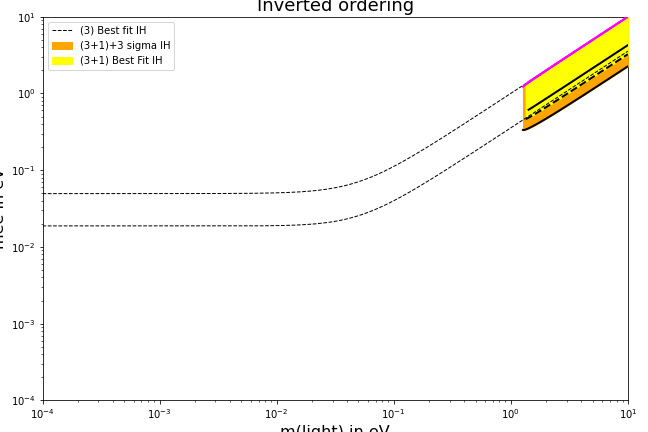

In [7]:
plt.figure(figsize=(9,6))

#for i in range(0,1000):
#    NHm1=numpy.linspace(0,1,10000)
#    IHmee=abs(IHc12*IHc13*IHc14*IHm1 + 
#              IHs12*IHc13*IHc14*IHm2*cmath.exp(complex(0,A[i])) + 
#              IHs13*IHc14*IHm3*cmath.exp(complex(0,B[i])) +
#              IHs14*IHm4*cmath.exp(complex(0,C[i])))
#    pylab.plot(IHm3,IHmee,color="yellow",linestyle="-",linewidth=1, alpha=1)

IHmee1=abs(IHc12*IHc13*IHm111 + IHs12*IHc13*IHm222 + IHs13*IHm333)
IHmee2=abs(IHc12*IHc13*IHm111 - IHs12*IHc13*IHm222 - IHs13*IHm333)

pylab.plot(IHm333,IHmee1,color="black",label="(3) Best fit IH",linestyle="--",linewidth=1, alpha=1,zorder=12)
pylab.plot(IHm333,IHmee2,color="black",linestyle="--",linewidth=1, alpha=1,zorder=12)

IHmee11=abs(IHc12*IHc13*IHc14*IHm1 + 
                  IHs12*IHc13*IHc14*IHm2*cmath.exp(complex(0,0*numpy.pi)) + 
                  IHs13*IHm3*IHc14*cmath.exp(complex(0,0*numpy.pi)) + 
                  IHs14*IHm4*cmath.exp(complex(0,0*numpy.pi))) #All masses different, 0,0,0 (in terms of pi)#

IHmee16=abs(IHc12*IHc13*IHc14*IHm1 + 
                  IHs12*IHc13*IHc14*IHm2*cmath.exp(complex(0,1*numpy.pi)) + 
                  IHs13*IHm3*IHc14*cmath.exp(complex(0,1*numpy.pi)) + 
                  IHs14*IHm4*cmath.exp(complex(0,1*numpy.pi))) #All masses different, 1.009,0.114,1 (in terms of pi)

maxIHmee11=abs(minIHc12*minIHc13*minIHc14*maxIHm1 + 
                  maxIHs12*minIHc13*minIHc14*maxIHm2*cmath.exp(complex(0,0*numpy.pi)) + 
                  maxIHs13*IHm3*minIHc14*cmath.exp(complex(0,0*numpy.pi)) + 
                  maxIHs14*maxIHm4*cmath.exp(complex(0,0*numpy.pi))) #All masses different, 0,0,0 (in terms of pi)#

maxIHmee16=abs(minIHc12*minIHc13*minIHc14*maxIHm1 + 
                  maxIHs12*minIHc13*minIHc14*maxIHm2*cmath.exp(complex(0,1*numpy.pi)) + 
                  maxIHs13*IHm3*minIHc14*cmath.exp(complex(0,1*numpy.pi)) + 
                  maxIHs14*maxIHm4*cmath.exp(complex(0,1*numpy.pi))) #All masses different, 1.009,0.114,1 (in terms of pi)

minIHmee11=abs(maxIHc12*maxIHc13*maxIHc14*minIHm1 + 
                  minIHs12*maxIHc13*maxIHc14*minIHm2*cmath.exp(complex(0,0*numpy.pi)) + 
                  minIHs13*IHm3*maxIHc14*cmath.exp(complex(0,0*numpy.pi)) + 
                  minIHs14*minIHm4*cmath.exp(complex(0,0*numpy.pi))) #All masses different, 0,0,0 (in terms of pi)#

minIHmee16=abs(maxIHc12*maxIHc13*maxIHc14*minIHm1 + 
                  minIHs12*maxIHc13*maxIHc14*minIHm2*cmath.exp(complex(0,1*numpy.pi)) + 
                  minIHs13*IHm3*maxIHc14*cmath.exp(complex(0,1*numpy.pi)) + 
                  minIHs14*minIHm4*cmath.exp(complex(0,1*numpy.pi))) #All masses different, 1.009,0.114,1 (in terms of pi)

pylab.plot(IHm3,minIHmee11,color="magenta",linestyle="-",linewidth=2, alpha=1, zorder=13)
pylab.plot(IHm3,minIHmee16,color="black",linestyle="-",linewidth=2, alpha=1, zorder=13)

pylab.plot(IHm3,maxIHmee11,color="magenta",linestyle="-",linewidth=2, alpha=1, zorder=13)
pylab.plot(IHm3,maxIHmee16,color="black",linestyle="-",linewidth=2, alpha=1, zorder=13)

pylab.plot(IHm3,IHmee11,color="magenta",linestyle="--",linewidth=2, alpha=1, zorder=13)
pylab.plot(IHm3,IHmee16,color="black",linestyle="--",linewidth=2, alpha=1, zorder=13)

plt.fill_between(IHm3, maxIHmee11, maxIHmee16, color="orange",label="(3+1)+3 sigma IH",alpha=1,zorder=11)
plt.fill_between(IHm3, IHmee11, IHmee16, color="yellow",label="(3+1) Best Fit IH",alpha=1,zorder=11)

plt.xscale("log")
plt.yscale("log")

plt.xlim(0.0001,10)
plt.ylim(0.0001,10)
plt.tight_layout()
plt.title("Inverted ordering", fontsize=18)
pylab.xlabel("m(light) in eV",fontsize=16)
pylab.ylabel("mee in eV",fontsize=16)
pylab.legend(fontsize=10,loc=2)
pylab.show()

<IPython.core.display.Javascript object>


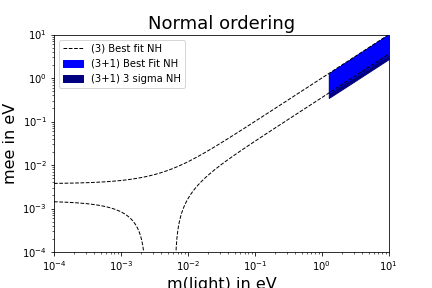

In [12]:
fig=plt.figure()

def animate(frame): 
    T14=numpy.arcsin((0.023)**(1/2))*frame/100
    maxT14=numpy.arcsin((0.04)**(1/2))*frame/100
    minT14=numpy.arcsin((0.006)**(1/2))*frame/100
    
    NHs14=(numpy.sin(T14))**2
    NHc14=(numpy.cos(T14))**2
    
    maxNHs14=(numpy.sin(maxT14))**2
    maxNHc14=(numpy.cos(minT14))**2
    
    minNHs14=(numpy.sin(minT14))**2
    minNHc14=(numpy.cos(maxT14))**2
    
    NHmee11=abs(NHc12*NHc13*NHc14*NHm1 + 
                  NHs12*NHc13*NHc14*NHm2*cmath.exp(complex(0,0*numpy.pi)) + 
                  NHs13*NHm3*NHc14*cmath.exp(complex(0,0*numpy.pi)) + 
                  NHs14*NHm4*cmath.exp(complex(0,0*numpy.pi))) #All masses different, 0,0,0 (in terms of pi)

    NHmee12=abs(NHc12*NHc13*NHc14*NHm1 + 
                      NHs12*NHc13*NHc14*NHm2*cmath.exp(complex(0,1*numpy.pi)) + 
                      NHs13*NHm3*NHc14*cmath.exp(complex(0,0*numpy.pi)) + 
                      NHs14*NHm4*cmath.exp(complex(0,1*numpy.pi))) #All masses different, 0,0,0 (in terms of pi)
    
    NHmee13=abs(NHc12*NHc13*NHc14*NHm1 + 
                  NHs12*NHc13*NHc14*NHm2*cmath.exp(complex(0,(1-frame/100)*numpy.pi)) + 
                  NHs13*NHm3*NHc14*cmath.exp(complex(0,0*numpy.pi)) + 
                  NHs14*NHm4*cmath.exp(complex(0,1*numpy.pi))) #All masses different, 0,0,0 (in terms of pi)

    NHmee16=abs(NHc12*NHc13*NHc14*NHm1 + 
                  NHs12*NHc13*NHc14*NHm2*cmath.exp(complex(0,1*numpy.pi)) + 
                  NHs13*NHm3*NHc14*cmath.exp(complex(0,(1)*numpy.pi)) + 
                  NHs14*NHm4*cmath.exp(complex(0,(1)*numpy.pi))) #All masses different, 1,1,1 (in terms of pi)
    
    
    
    maxNHmee11=abs(minNHc12*minNHc13*minNHc14*NHm1 + 
                  maxNHs12*minNHc13*minNHc14*maxNHm2*cmath.exp(complex(0,0*numpy.pi)) + 
                  maxNHs13*maxNHm3*minNHc14*cmath.exp(complex(0,0*numpy.pi)) + 
                  maxNHs14*maxNHm4*cmath.exp(complex(0,0*numpy.pi))) #All masses different, 0,0,0 (in terms of pi)

    maxNHmee12=abs(minNHc12*minNHc13*minNHc14*NHm1 + 
                  maxNHs12*minNHc13*minNHc14*maxNHm2*cmath.exp(complex(0,numpy.pi)) + 
                  maxNHs13*maxNHm3*minNHc14*cmath.exp(complex(0,0)) + 
                  maxNHs14*maxNHm4*cmath.exp(complex(0,numpy.pi))) #All masses different, 0,0,1 (in terms of pi)
    
    maxNHmee13=abs(minNHc12*minNHc13*minNHc14*NHm1 + 
                  maxNHs12*minNHc13*minNHc14*maxNHm2*cmath.exp(complex(0,(1-frame/100)*numpy.pi)) + 
                  maxNHs13*maxNHm3*minNHc14*cmath.exp(complex(0,0*numpy.pi)) + 
                  maxNHs14*maxNHm4*cmath.exp(complex(0,1*numpy.pi))) #All masses different, 0,0,0 (in terms of pi)

    maxNHmee16=abs(minNHc12*minNHc13*minNHc14*NHm1 + 
                  maxNHs12*minNHc13*minNHc14*maxNHm2*cmath.exp(complex(0,(1)*numpy.pi)) + 
                  maxNHs13*maxNHm3*minNHc14*cmath.exp(complex(0,(1)*numpy.pi)) + 
                  maxNHs14*maxNHm4*cmath.exp(complex(0,(1)*numpy.pi))) #All masses different, 1,1,1 (in terms of pi)
    
    
    
    minNHmee11=abs(maxNHc12*maxNHc13*maxNHc14*NHm1 + 
                  minNHs12*maxNHc13*maxNHc14*minNHm2*cmath.exp(complex(0,0*numpy.pi)) + 
                  minNHs13*minNHm3*maxNHc14*cmath.exp(complex(0,0*numpy.pi)) + 
                  minNHs14*minNHm4*cmath.exp(complex(0,0*numpy.pi))) #All masses different, 0,0,0 (in terms of pi)

    minNHmee12=abs(maxNHc12*maxNHc13*maxNHc14*NHm1 + 
                  minNHs12*maxNHc13*maxNHc14*minNHm2*cmath.exp(complex(0,numpy.pi)) + 
                  minNHs13*minNHm3*maxNHc14*cmath.exp(complex(0,0)) + 
                  minNHs14*minNHm4*cmath.exp(complex(0,numpy.pi))) #All masses different, 0,0,1 (in terms of pi)
    
    minNHmee13=abs(maxNHc12*maxNHc13*maxNHc14*NHm1 + 
                  minNHs12*maxNHc13*maxNHc14*minNHm2*cmath.exp(complex(0,(1-frame/100)*numpy.pi)) + 
                  minNHs13*minNHm3*maxNHc14*cmath.exp(complex(0,0*numpy.pi)) + 
                  minNHs14*minNHm4*cmath.exp(complex(0,1*numpy.pi))) #All masses different, 0,0,0 (in terms of pi)

    minNHmee16=abs(maxNHc12*maxNHc13*maxNHc14*NHm1 + 
                  minNHs12*maxNHc13*maxNHc14*minNHm2*cmath.exp(complex(0,(1)*numpy.pi)) + 
                  minNHs13*minNHm3*maxNHc14*cmath.exp(complex(0,(1)*numpy.pi)) + 
                  minNHs14*minNHm4*cmath.exp(complex(0,(1)*numpy.pi))) #All masses different, 1,1,1 (in terms of pi)
    
    plt.cla()
    
    NHmee1=abs(NHc12*NHc13*NHm111 - NHs12*NHc13*NHm222 + NHs13*NHm333)                           
    NHmee2=abs(NHc12*NHc13*NHm111 + NHs12*NHc13*NHm222 + NHs13*NHm333)
    NHmee3=abs(NHc12*NHc13*NHm111 - NHs12*NHc13*NHm222 - NHs13*NHm333)
    
    maxNHmee1=abs(minNHc12*minNHc13*NHm111 - maxNHs12*minNHc13*maxNHm222 + maxNHs13*maxNHm333)                           
    maxNHmee2=abs(minNHc12*minNHc13*NHm111 + maxNHs12*minNHc13*maxNHm222 + maxNHs13*maxNHm333)
    maxNHmee3=abs(minNHc12*minNHc13*NHm111 - maxNHs12*minNHc13*maxNHm222 - maxNHs13*maxNHm333)
    
    minNHmee1=abs(maxNHc12*maxNHc13*NHm111 - minNHs12*maxNHc13*minNHm222 + minNHs13*minNHm333)                           
    minNHmee2=abs(maxNHc12*maxNHc13*NHm111 + minNHs12*maxNHc13*minNHm222 + minNHs13*minNHm333)
    minNHmee3=abs(maxNHc12*maxNHc13*NHm111 - minNHs12*maxNHc13*minNHm222 - minNHs13*minNHm333)

    NHm1filt1=NHm111[NHm111<0.0024]
    NHm1filt3=NHm111[NHm111>0.0065]
    NHmee1filt1=NHmee1[NHm111<0.0024]
    NHmee3filt3=NHmee3[NHm111>0.0065]
    
    pylab.plot(NHm1filt1,NHmee1filt1,color="black",label= "(3) Best fit NH",linestyle="--",linewidth=1, alpha=1,zorder=20)
    pylab.plot(NHm1,NHmee2,color="black",linestyle="--",linewidth=1, alpha=1,zorder=20)
    pylab.plot(NHm1filt3,NHmee3filt3,color="black",linestyle="--",linewidth=1, alpha=1,zorder=20)
    
    if frame==0:
        plt.fill_between(NHm1, NHmee1, NHmee2, color="blue",alpha=1,zorder=14)
        plt.fill_between(NHm1, NHmee1, NHmee3, color="blue",alpha=1,zorder=14)
        plt.fill_between(NHm1, NHmee2, 0,where=(NHm1>NHm1[numpy.argmin(NHmee1)])&(NHm1<NHm1[numpy.argmin(NHmee3)]), color="blue",label="(3+1) Best Fit NH",alpha=1,zorder=14)
        
        plt.fill_between(NHm1, maxNHmee1, maxNHmee2, color="navy",alpha=1,zorder=13)
        plt.fill_between(NHm1, maxNHmee1, maxNHmee3, color="navy",alpha=1,zorder=13)
        plt.fill_between(NHm1, maxNHmee2, 0,where=(NHm1>NHm1[numpy.argmin(maxNHmee1)])&(NHm1<NHm1[numpy.argmin(maxNHmee3)]), color="navy",label="(3+1) 3 sigma NH",alpha=1,zorder=13)
        
        plt.fill_between(NHm1, minNHmee1, minNHmee2, color="navy",alpha=1,zorder=13)
        plt.fill_between(NHm1, minNHmee1, minNHmee3, color="navy",alpha=1,zorder=13)
        plt.fill_between(NHm1, minNHmee2, 0,where=(NHm1>NHm1[numpy.argmin(minNHmee1)])&(NHm1<NHm1[numpy.argmin(minNHmee3)]), color="navy",alpha=1,zorder=13)
    else:
        plt.fill_between(NHm1, NHmee11, NHmee12, color="blue",label="(3+1) Best Fit NH",alpha=1,zorder=14)
        plt.fill_between(NHm1, NHmee11, NHmee16, color="blue",alpha=1,zorder=14)  
        plt.fill_between(NHm1, NHmee11, 0, where=(NHm1>NHm1[numpy.argmin(NHmee12)])&(NHm1<NHm1[numpy.argmin(NHmee16)]) ,color="blue",alpha=1,zorder=14)
        plt.fill_between(NHm1, NHmee11, 0, where=(NHm1>NHm1[numpy.argmin(NHmee13)])&(NHm1<NHm1[numpy.argmin(NHmee16)]) ,color="blue",alpha=1,zorder=14)
        plt.fill_between(NHm1, NHmee12, NHmee13, color="blue",alpha=1,zorder=14)
        plt.fill_between(NHm1, NHmee11, 0, where=(NHm1>NHm1[numpy.argmin(NHmee12)])&(NHm1<NHm1[numpy.argmin(NHmee13)]) ,color="blue",alpha=1,zorder=14)
    
        plt.fill_between(NHm1, maxNHmee11, minNHmee12, color="navy",label="(3+1) 3 sigma NH",alpha=1,zorder=13)
        plt.fill_between(NHm1, maxNHmee11, maxNHmee16, color="navy",alpha=1,zorder=13)
        plt.fill_between(NHm1, maxNHmee11, 0, where=(NHm1>NHm1[numpy.argmin(minNHmee12)])&(NHm1<NHm1[numpy.argmin(maxNHmee16)]) ,color="navy",alpha=1,zorder=13)
    
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim(0.0001, 10)
    plt.ylim(0.0001, 10)
    plt.title("Normal ordering", fontsize=18)
    pylab.xlabel("m(light) in eV",fontsize=16)
    pylab.ylabel("mee in eV",fontsize=16)
    pylab.legend(fontsize=10,loc=2)
    
    
anim = FuncAnimation(fig, animate, frames=100, interval=20)

<IPython.core.display.Javascript object>


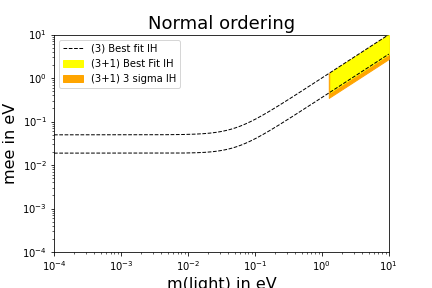

In [13]:
fig2=plt.figure()

def animate2(frame2): 
    IT14=numpy.arcsin((0.023)**(1/2))*frame2/100
    maxIT14=numpy.arcsin((0.04)**(1/2))*frame2/100
    minIT14=numpy.arcsin((0.006)**(1/2))*frame2/100
    
    IHs14=(numpy.sin(IT14))**2
    IHc14=(numpy.cos(IT14))**2
    
    maxIHs14=(numpy.sin(maxIT14))**2
    maxIHc14=(numpy.cos(minIT14))**2
    
    minIHs14=(numpy.sin(minIT14))**2
    minIHc14=(numpy.cos(maxIT14))**2
    
    IHmee11=abs(IHc12*IHc13*IHc14*IHm1 + 
                  IHs12*IHc13*IHc14*IHm2*cmath.exp(complex(0,0*numpy.pi)) + 
                  IHs13*IHm3*IHc14*cmath.exp(complex(0,0*numpy.pi)) + 
                  IHs14*IHm4*cmath.exp(complex(0,0*numpy.pi))) #All masses different, 0,0,0 (in terms of pi)

    IHmee16=abs(IHc12*IHc13*IHc14*IHm1 + 
                  IHs12*IHc13*IHc14*IHm2*cmath.exp(complex(0,1*numpy.pi)) + 
                  IHs13*IHm3*IHc14*cmath.exp(complex(0,(1)*numpy.pi)) + 
                  IHs14*IHm4*cmath.exp(complex(0,(1)*numpy.pi))) #All masses different, 1,1,1 (in terms of pi)
    
    
    
    maxIHmee11=abs(minIHc12*minIHc13*minIHc14*maxIHm1 + 
                  maxIHs12*minIHc13*minIHc14*maxIHm2*cmath.exp(complex(0,0*numpy.pi)) + 
                  maxIHs13*IHm3*minIHc14*cmath.exp(complex(0,0*numpy.pi)) + 
                  maxIHs14*maxIHm4*cmath.exp(complex(0,0*numpy.pi))) #All masses different, 0,0,0 (in terms of pi)

    maxIHmee16=abs(minIHc12*minIHc13*minIHc14*maxIHm1 + 
                  maxIHs12*minIHc13*minIHc14*maxIHm2*cmath.exp(complex(0,(1)*numpy.pi)) + 
                  maxIHs13*IHm3*minIHc14*cmath.exp(complex(0,(1)*numpy.pi)) + 
                  maxIHs14*maxIHm4*cmath.exp(complex(0,(1)*numpy.pi))) #All masses different, 1,1,1 (in terms of pi)
    
    
    
    #minIHmee11=abs(maxIHc12*maxIHc13*maxIHc14*minIHm1 + 
    #              minIHs12*maxIHc13*maxIHc14*minIHm2*cmath.exp(complex(0,0*numpy.pi)) + 
    #              minIHs13*IHm3*maxIHc14*cmath.exp(complex(0,0*numpy.pi)) + 
    #              minIHs14*minIHm4*cmath.exp(complex(0,0*numpy.pi))) #All masses different, 0,0,0 (in terms of pi)

    #minIHmee16=abs(maxIHc12*maxIHc13*maxIHc14*minIHm1 + 
    #              minIHs12*maxIHc13*maxIHc14*minIHm2*cmath.exp(complex(0,(1)*numpy.pi)) + 
    #              minIHs13*IHm3*maxIHc14*cmath.exp(complex(0,(1)*numpy.pi)) + 
    #              minIHs14*minIHm4*cmath.exp(complex(0,(1)*numpy.pi))) #All masses different, 1,1,1 (in terms of pi)
    
    plt.cla()
    
    IHmee1=abs(IHc12*IHc13*IHm111 + IHs12*IHc13*IHm222 + IHs13*IHm333)
    IHmee2=abs(IHc12*IHc13*IHm111 - IHs12*IHc13*IHm222 - IHs13*IHm333)
    
    maxIHmee1=abs(minIHc12*minIHc13*maxIHm111 + maxIHs12*minIHc13*maxIHm222 + maxIHs13*IHm333)
    maxIHmee2=abs(minIHc12*minIHc13*maxIHm111 - maxIHs12*minIHc13*maxIHm222 - maxIHs13*IHm333)

    pylab.plot(IHm333,IHmee1,color="black",label="(3) Best fit IH",linestyle="--",linewidth=1, alpha=1,zorder=14)
    pylab.plot(IHm333,IHmee2,color="black",linestyle="--",linewidth=1, alpha=1,zorder=14)
    
    if frame2==0:
        plt.fill_between(IHm333, IHmee1, IHmee2, color="yellow",label="(3+1) Best Fit IH",alpha=1,zorder=14)    
        plt.fill_between(IHm333, maxIHmee1, maxIHmee2, color="orange",label="(3+1) 3 sigma IH",alpha=1,zorder=13)
    else:
        plt.fill_between(IHm3, IHmee11, IHmee16, color="yellow",label="(3+1) Best Fit IH",alpha=1,zorder=14)    
        plt.fill_between(IHm3, maxIHmee11, maxIHmee16, color="orange",label="(3+1) 3 sigma IH",alpha=1,zorder=13)
    
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim(0.0001, 10)
    plt.ylim(0.0001, 10)
    plt.title("Normal ordering", fontsize=18)
    pylab.xlabel("m(light) in eV",fontsize=16)
    pylab.ylabel("mee in eV",fontsize=16)
    pylab.legend(fontsize=10,loc=2)

anim2 = FuncAnimation(fig2, animate2, frames=100, interval=20)

In [10]:
#anim.save("Light sterile Neutrino animation NH.gif", matplotlib.animation.PillowWriter(fps=10))

In [11]:
#anim2.save("Light sterile Neutrino animation IH.gif", matplotlib.animation.PillowWriter(fps=10))